In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
num_classes = 10
epochs = 50
learning_rate = 0.001
batch_size = 64
display_step = 100
checkpoint = 'Dang.pth'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
assert device == 'cuda'
print(torch.cuda.is_available())

True


In [23]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

train_dataset = datasets.MNIST('../data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST('../data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size)

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, padding = 0)
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding = 0)
        self.maxpool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.maxpool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool3(x)
        x = nn.Flatten()(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [25]:
model = Net().to(device)

try:
    model.load_state_dict(torch.load(checkpoint))
except:
    print("!!! Hãy train để có checkpoint file")

!!! Hãy train để có checkpoint file


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
best_val_loss = 999

for epoch in range(1, epochs):
    
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % display_step == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}'.format(epoch,  batch_idx * len(data),
                                                                                 len(train_loader.dataset),
                                                                                 100. * batch_idx / len(train_loader),
                                                                                 loss.item()))
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            output = F.log_softmax(output, dim = 1)
            test_loss += criterion(output, target)
            pred = output.argmax(dim = 1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()
        test_loss /= len(test_loader.dataset)

        if test_loss < best_val_loss:
            best_val_loss = test_loss
            torch.save(model.state_dict(), checkpoint)
            print("***********    TEST_ACC = {}%    ***********".format(correct))

Train epoch: 1 [0/60000 (0%)]	Train Loss: 2.304181
Train epoch: 1 [6400/60000 (11%)]	Train Loss: 0.401362
Train epoch: 1 [12800/60000 (21%)]	Train Loss: 0.277918
Train epoch: 1 [19200/60000 (32%)]	Train Loss: 0.196355
Train epoch: 1 [25600/60000 (43%)]	Train Loss: 0.194131
Train epoch: 1 [32000/60000 (53%)]	Train Loss: 0.065960
Train epoch: 1 [38400/60000 (64%)]	Train Loss: 0.246756
Train epoch: 1 [44800/60000 (75%)]	Train Loss: 0.180514
Train epoch: 1 [51200/60000 (85%)]	Train Loss: 0.409834
Train epoch: 1 [57600/60000 (96%)]	Train Loss: 0.145121
***********    TEST_ACC = 9680%    ***********
Train epoch: 2 [0/60000 (0%)]	Train Loss: 0.047759
Train epoch: 2 [6400/60000 (11%)]	Train Loss: 0.164887
Train epoch: 2 [12800/60000 (21%)]	Train Loss: 0.076887
Train epoch: 2 [19200/60000 (32%)]	Train Loss: 0.147850
Train epoch: 2 [25600/60000 (43%)]	Train Loss: 0.045038
Train epoch: 2 [32000/60000 (53%)]	Train Loss: 0.052051
Train epoch: 2 [38400/60000 (64%)]	Train Loss: 0.072176
Train epoch: 

In [27]:
model.load_state_dict(torch.load(checkpoint))
model.eval()

Net(
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [36]:
item = iter(test_loader)
data, target = next(item)
test_idx = random.choice(range(len(data)))

In [37]:
data = data[test_idx]
target = target[test_idx]
assert data.shape == (1, 28, 28)

In [38]:
def plot(data, model):
    data = torch.unsqueeze(data, dim = 0)
    data = data.to(device)
    output = model(data)
    output = F.log_softmax(output, dim = 1)
    pred = output.argmax(dim = 1, keepdim = True)
    print('Predict number : ', pred[0][0].detach().cpu().numpy())
    plt.imshow(data[0][0].detach().cpu().numpy(), cmap = 'gray')
    plt.show()

Predict number :  2


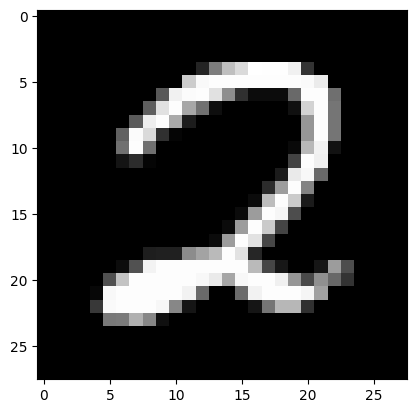

In [39]:
data = data.to(device)
plot(data, model)